<h1><center>Credit Card Approval Prediction</center></h1>


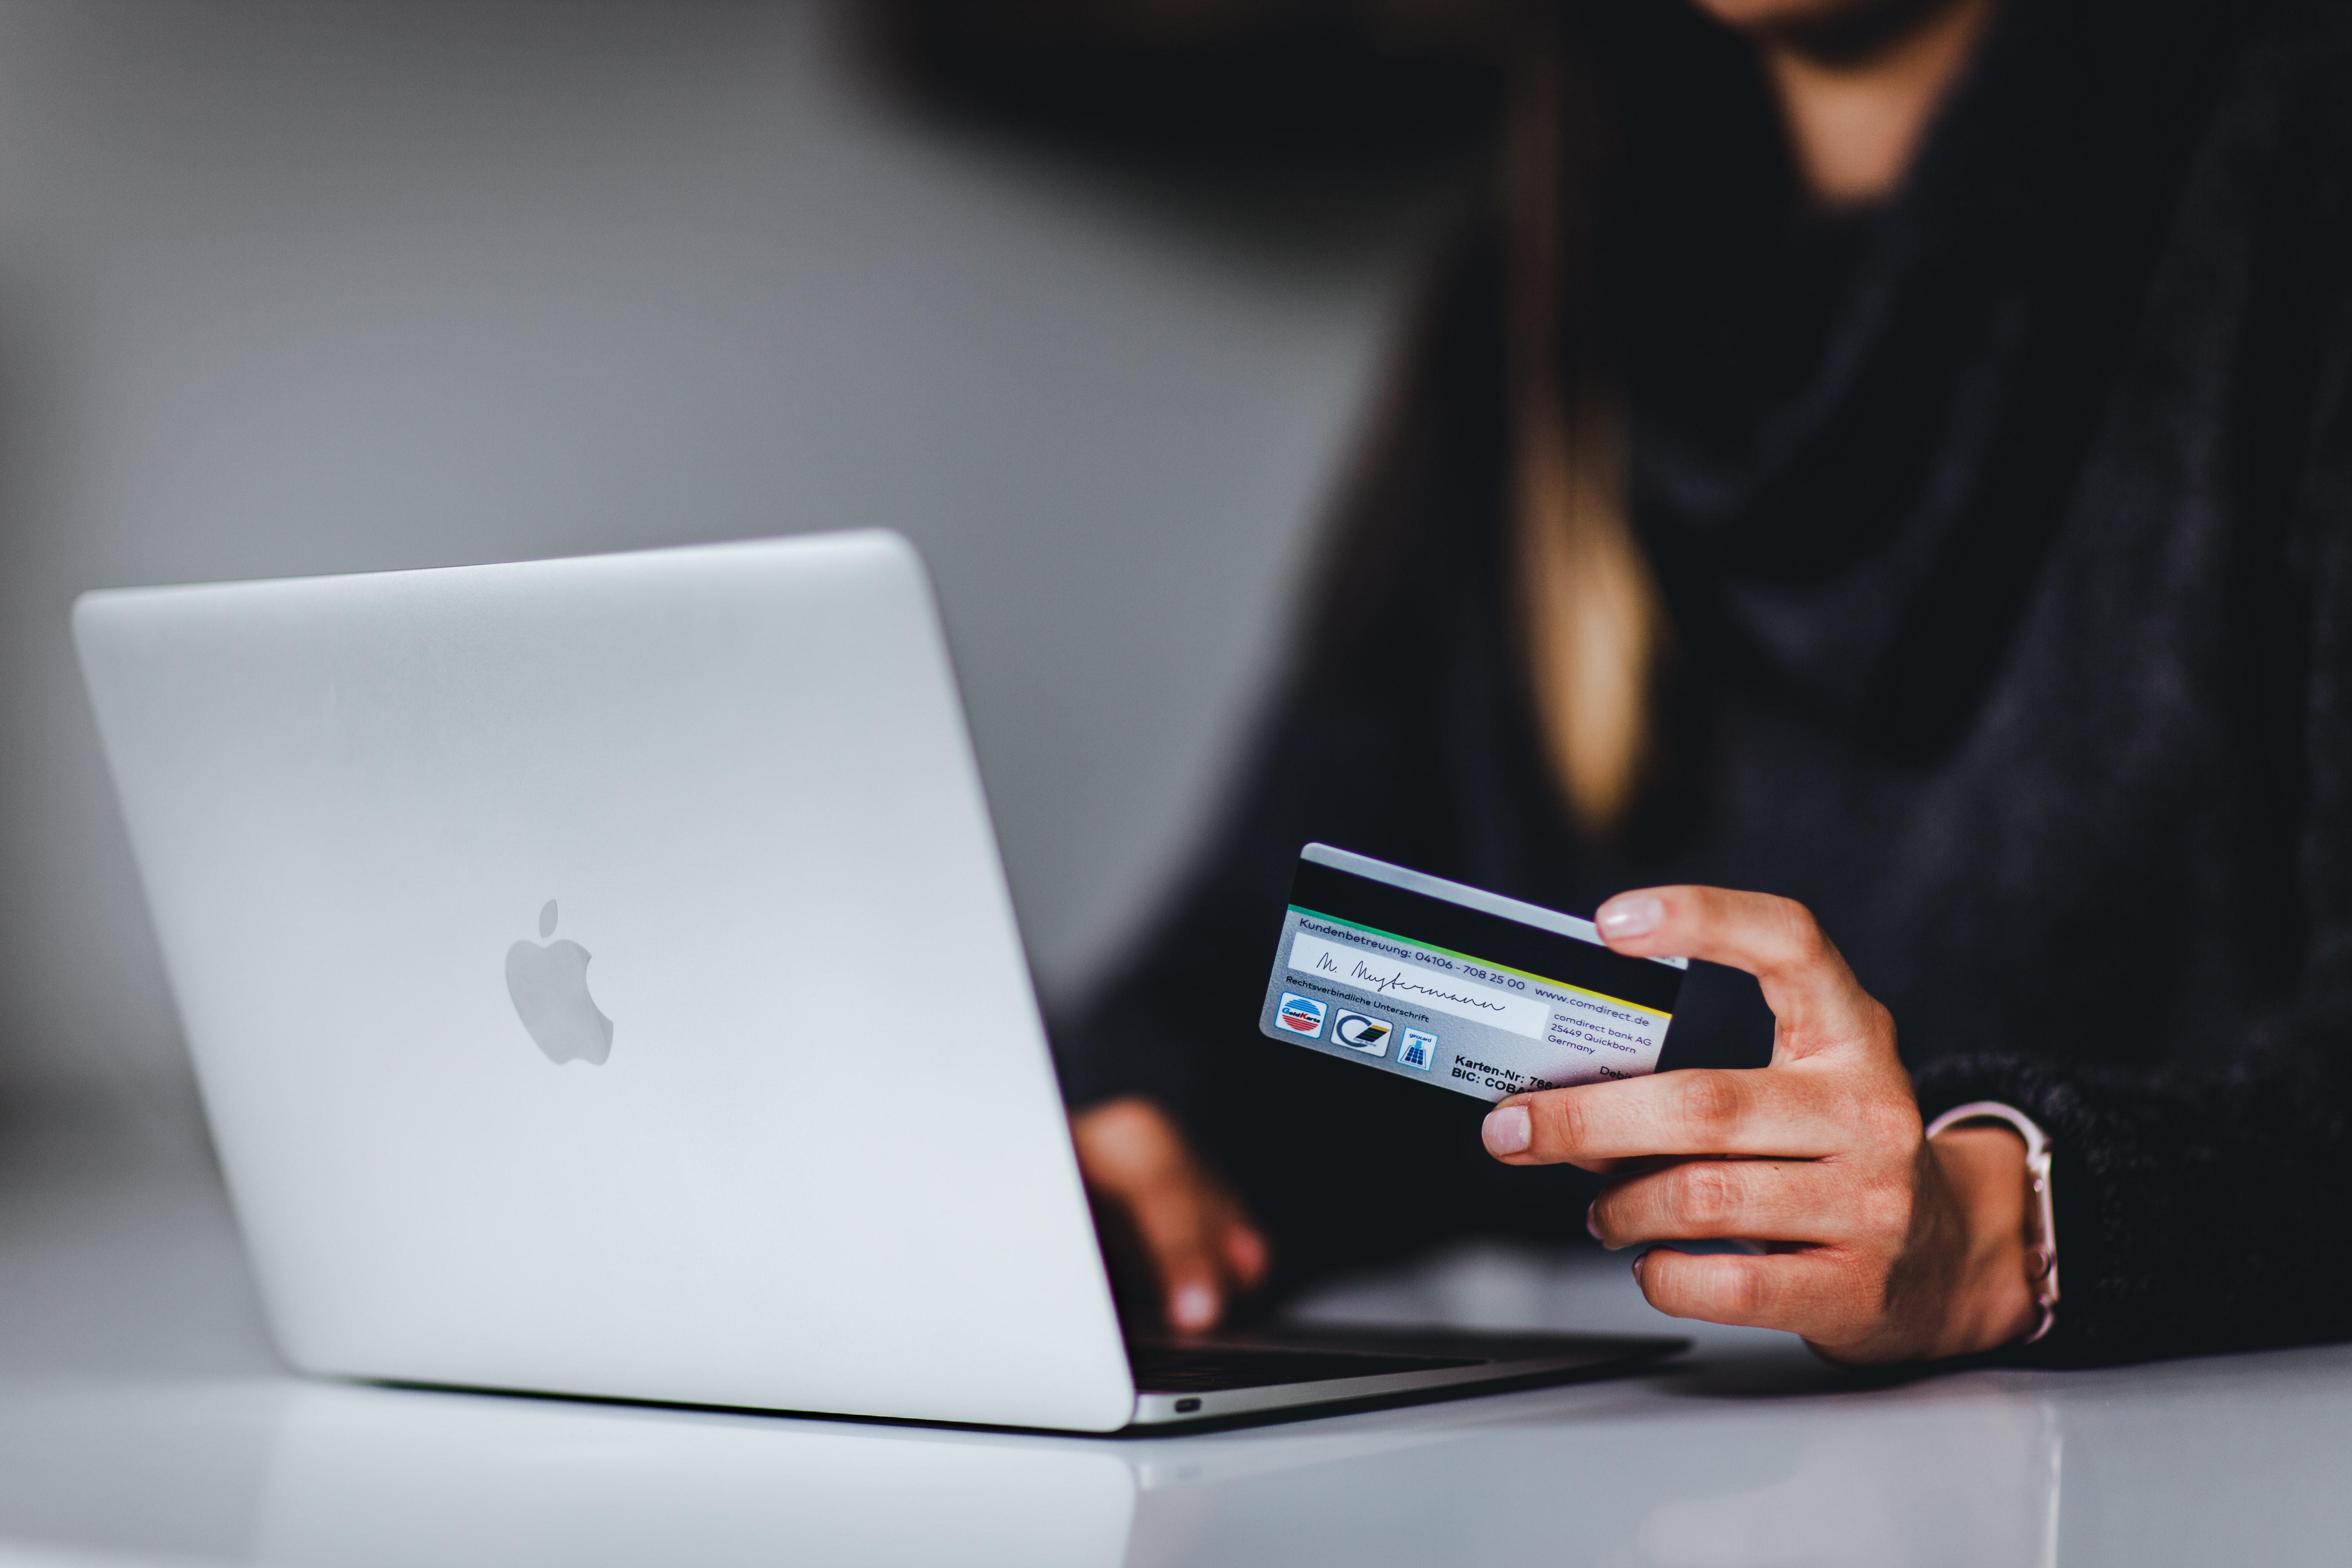

# Introduction

## The Problem  


A Company wants to automate the Credit Card eligibility process based on customer detail provided while filling online application.

They have given a problem to identify the customers segments which are eligible for Credit Card approval, so that they can specifically target these customers.
It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank is able to decide whether to issue a credit card to the applicant. 

## The Solution 

I set out to find ways to use data to help the company by identifying those who should have or not their credit card approvaled. 

The goal of this project is to model the historical submission for credit card from the company to predict whether a constumer request  will ultimately be approved or declined. The client classified as a risk client should have the submited declined. 


## The Data

There're two tables could be merged by ID

<table>
<thead>
<tr>
<th>application_record.csv</th>
<th></th>
<th></th>
</tr>
</thead>
<tbody>
<tr>
<td>Feature name</td>
<td>Explanation</td>
<td>Remarks</td>
</tr>
<tr>
<td><code>ID</code></td>
<td>Client number</td>
<td></td>
</tr>
<tr>
<td><code>CODE_GENDER</code></td>
<td>Gender</td>
<td></td>
</tr>
<tr>
<td><code>FLAG_OWN_CAR</code></td>
<td>Is there a car</td>
<td></td>
</tr>
<tr>
<td><code>FLAG_OWN_REALTY</code></td>
<td>Is there a property</td>
<td></td>
</tr>
<tr>
<td><code>CNT_CHILDREN</code></td>
<td>Number of children</td>
<td></td>
</tr>
<tr>
<td><code>AMT_INCOME_TOTAL</code></td>
<td>Annual income</td>
<td></td>
</tr>
<tr>
<td><code>NAME_INCOME_TYPE</code></td>
<td>Income category</td>
<td></td>
</tr>
<tr>
<td><code>NAME_EDUCATION_TYPE</code></td>
<td>Education level</td>
<td></td>
</tr>
<tr>
<td><code>NAME_FAMILY_STATUS</code></td>
<td>Marital status</td>
<td></td>
</tr>
<tr>
<td><code>NAME_HOUSING_TYPE</code></td>
<td>Way of living</td>
<td></td>
</tr>
<tr>
<td><code>DAYS_BIRTH</code></td>
<td>Birthday</td>
<td>Count backwards from current day (0), -1 means yesterday</td>
</tr>
<tr>
<td><code>DAYS_EMPLOYED</code></td>
<td>Start date  of employment</td>
<td>Count backwards from current day(0). If  positive, it means the person currently unemployed.</td>
</tr>
<tr>
<td><code>FLAG_MOBIL</code></td>
<td>Is there a mobile   phone</td>
<td></td>
</tr>
<tr>
<td><code>FLAG_WORK_PHONE</code></td>
<td>Is there a work phone</td>
<td></td>
</tr>
<tr>
<td><code>FLAG_PHONE</code></td>
<td>Is there a phone</td>
<td></td>
</tr>
<tr>
<td><code>FLAG_EMAIL</code></td>
<td>Is there an email</td>
<td></td>
</tr>
<tr>
<td><code>OCCUPATION_TYPE</code></td>
<td>Occupation</td>
<td></td>
</tr>
<tr>
<td><code>CNT_FAM_MEMBERS</code></td>
<td>Family size</td>
<td></td>
</tr>
</tbody>
</table>


<table>
<thead>
<tr>
<th>credit_record.csv</th>
<th></th>
<th></th>
</tr>
</thead>
<tbody>
<tr>
<td>Feature name</td>
<td>Explanation</td>
<td>Remarks</td>
</tr>
<tr>
<td><code>ID</code></td>
<td>Client number</td>
<td></td>
</tr>
<tr>
<td><code>MONTHS_BALANCE</code></td>
<td>Record month</td>
<td>The month of the extracted data is the starting point,  backwards, 0 is the current month, -1 is the previous month,  and so on</td>
</tr>
<tr>
<td><code>STATUS</code></td>
<td>Status</td>
<td>0: 1-29 days past due 1: 30-59 days past due   2: 60-89 days overdue 3: 90-119 days overdue    4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days    C: paid off that month X: No loan for the month</td>
</tr>
</tbody>
</table>

# Loading Datas and Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE   

%matplotlib inline

import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, plot_confusion_matrix, accuracy_score, f1_score, plot_roc_curve
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings("ignore")

import joblib


In [2]:
#Load datas and merge
file_one_path = "./data/application_record.csv"
file_two_path = "./data/credit_record.csv"

# main dataset
df= pd.read_csv(file_one_path)

record = pd.read_csv(file_two_path)



In [3]:
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [4]:
record

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


# Exploratory Data Analysis

## Record dataset

We don't know who are the goods and bads clients. So, we are going to generate the target based on the record dataset. 






The **MONTHS_BALANCE** brings the the month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on. Let's get only the one who represents the clients' account open month. 
After that, we can merge this column with the main dataset

In [5]:
# find all users' account open month.
first_month=pd.DataFrame(record.groupby(["ID"])["MONTHS_BALANCE"].agg(min))
first_month=first_month.rename(columns={'MONTHS_BALANCE':'first_month'}) 
df=pd.merge(df,first_month,how="left",on="ID") #merge to record data


In [6]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,first_month
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-15.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-14.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-29.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-4.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-26.0


Now, let's see how the column status looks like:

Status:
> 0: 1-29 days past due  
> 1: 30-59 days past due  
> 2: 60-89 days overdue  
> 3: 90-119 days overdue  
> 4: 120-149 days overdue  
> 5: Overdue or bad debts, write-offs for more than 150 days  
> C: paid off that month  
> X: No loan for the month 

In [7]:
print("Status  %")
record['STATUS'].value_counts(normalize=True) * 100

Status  %


C    42.155401
0    36.537205
X    19.953747
1     1.057626
5     0.161457
2     0.082779
3     0.030518
4     0.021267
Name: STATUS, dtype: float64

Let's classify clients who overdue for more than 60 days as target risk users. Those samples are marked as '1', else are '0'.


In [8]:
record['risky_client'] = None
record['risky_client'][record['STATUS'] =='2']='Yes' 
record['risky_client'][record['STATUS'] =='3']='Yes' 
record['risky_client'][record['STATUS'] =='4']='Yes' 
record['risky_client'][record['STATUS'] =='5']='Yes' 

In [9]:
target=record.groupby('ID').count()
target['risky_client'][target['risky_client'] > 0]='Yes' 
target['risky_client'][target['risky_client'] == 0]='No'

target = target[['risky_client']]


df=pd.merge(df,target,how='inner',on='ID')

df.loc[df['risky_client']=='Yes','risky_client']='Yes' 
df.loc[df['risky_client']=='No','risky_client']='No'

In [10]:
print("risky_client  %")
df['risky_client'].value_counts(normalize=True) * 100

risky_client  %


No     98.310338
Yes     1.689662
Name: risky_client, dtype: float64

### What does the data look like?

In [11]:
df.columns = map(str.lower, df.columns)

In [12]:
df.head()

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,days_birth,days_employed,flag_mobil,flag_work_phone,flag_phone,flag_email,occupation_type,cnt_fam_members,first_month,risky_client
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-15.0,No
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-14.0,No
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-29.0,No
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-4.0,No
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-26.0,No


In [13]:
df.shape

(36457, 20)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   36457 non-null  int64  
 1   code_gender          36457 non-null  object 
 2   flag_own_car         36457 non-null  object 
 3   flag_own_realty      36457 non-null  object 
 4   cnt_children         36457 non-null  int64  
 5   amt_income_total     36457 non-null  float64
 6   name_income_type     36457 non-null  object 
 7   name_education_type  36457 non-null  object 
 8   name_family_status   36457 non-null  object 
 9   name_housing_type    36457 non-null  object 
 10  days_birth           36457 non-null  int64  
 11  days_employed        36457 non-null  int64  
 12  flag_mobil           36457 non-null  int64  
 13  flag_work_phone      36457 non-null  int64  
 14  flag_phone           36457 non-null  int64  
 15  flag_email           36457 non-null 

In [15]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,36457.0,5.078227e+06,41875.240788,5008804.0,5042028.0,5074614.0,5115396.0,5150487.0
cnt_children,36457.0,4.303152e-01,0.742367,0.0,0.0,0.0,1.0,19.0
amt_income_total,36457.0,1.866857e+05,101789.226482,27000.0,121500.0,157500.0,225000.0,1575000.0
days_birth,36457.0,-1.597517e+04,4200.549944,-25152.0,-19438.0,-15563.0,-12462.0,-7489.0
days_employed,36457.0,5.926294e+04,137651.334859,-15713.0,-3153.0,-1552.0,-408.0,365243.0
flag_mobil,36457.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0
flag_work_phone,36457.0,2.255260e-01,0.417934,0.0,0.0,0.0,0.0,1.0
flag_phone,36457.0,2.948131e-01,0.455965,0.0,0.0,0.0,1.0,1.0
flag_email,36457.0,8.972214e-02,0.285787,0.0,0.0,0.0,0.0,1.0
cnt_fam_members,36457.0,2.198453e+00,0.911686,1.0,2.0,2.0,3.0,20.0


Some interesting insights:

> Most of clients (75%) have 1 children or less. The biggest number is 19 whitch sounds like an outlier. We'll check it later. 

> Most of clients are employed for less than 1.5 year.

> The clients family is likely have 3 members or less. The max 20 sounds like an outlier. We'll check it later. 

## Search for null values

In [16]:
df.isnull().sum()

id                         0
code_gender                0
flag_own_car               0
flag_own_realty            0
cnt_children               0
amt_income_total           0
name_income_type           0
name_education_type        0
name_family_status         0
name_housing_type          0
days_birth                 0
days_employed              0
flag_mobil                 0
flag_work_phone            0
flag_phone                 0
flag_email                 0
occupation_type        11323
cnt_fam_members            0
first_month                0
risky_client               0
dtype: int64

Since there's a lot of null values at ***OCCUPATION_TYPE*** , we can drop this column

In [17]:
df.drop('occupation_type', axis=1, inplace=True)

## Search for Duplicated Values

In [18]:
# Checking duplicates in 'ID' column
len(df['id']) - len(df['id'].unique())

0

##  Drop id Column

In [19]:
df.drop('id', 1, inplace=True)

In [20]:
df.shape

(36457, 18)

## Numerical Columns

In [21]:
num_col = df.columns[(df.dtypes != 'object').values].tolist()


In [22]:
num_col

['cnt_children',
 'amt_income_total',
 'days_birth',
 'days_employed',
 'flag_mobil',
 'flag_work_phone',
 'flag_phone',
 'flag_email',
 'cnt_fam_members',
 'first_month']

#### Binary num features

Some num features are binary(Yes/No), let's make them categorical. 

> 'flag_mobil',  
> 'flag_work_phone',  
> 'flag_phone',  
> 'flag_email' 

In [23]:
for column in ['flag_mobil', 'flag_work_phone', 'flag_phone', 'flag_email']:
  df[column] = df[column].astype(object)


#### Find outliers

In [24]:
def find_outlier(df, column):
  outliers=[]  
  threshold=3
  mean = np.mean(df[column])
  std =np.std(df[column])
  for y in df[column]:
      z_score= (y - mean)/mean 
      if np.abs(z_score) > threshold:
          outliers.append(y)
  outliers = set(outliers)
  print(f"Total of Clients: {len(df[column])}")
  print(f"Outlier: {outliers}")

  if len(outliers) > 0:
    plt.figure(figsize=(7,4), dpi=100)
    sns.scatterplot(data=df[column],alpha=0.06)
    plt.axhline(y=list(outliers)[0], color='r', linestyle='-')
    plt.show()
    return df.loc[df[column].isin(set(outliers)), column].value_counts(sort=True)

  else:
    return "No outlier"



**cnt_children**

Total of Clients: 36457
Outlier: {2, 3, 4, 5, 7, 14, 19}


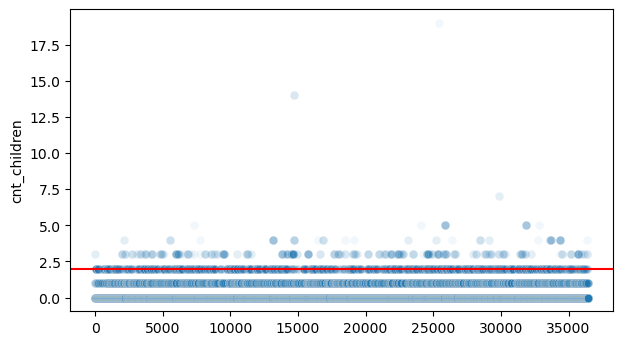

2     3256
3      419
4       63
5       20
14       3
7        2
19       1
Name: cnt_children, dtype: int64

In [25]:
find_outlier(df, 'cnt_children')

**amt_income_total**

Total of Clients: 36457
Outlier: {900000.0, 765000.0, 1125000.0, 945000.0, 787500.0, 810000.0, 1350000.0, 990000.0, 1575000.0}


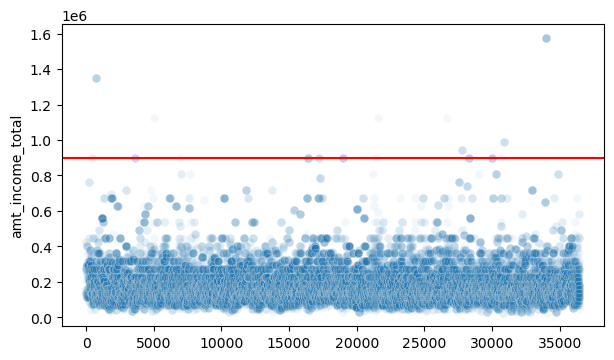

900000.0     39
810000.0     15
765000.0      9
1575000.0     8
1350000.0     6
787500.0      5
945000.0      4
990000.0      4
1125000.0     3
Name: amt_income_total, dtype: int64

In [26]:
find_outlier(df, 'amt_income_total')

**cnt_fam_members**

Total of Clients: 36457
Outlier: {9.0, 20.0, 15.0}


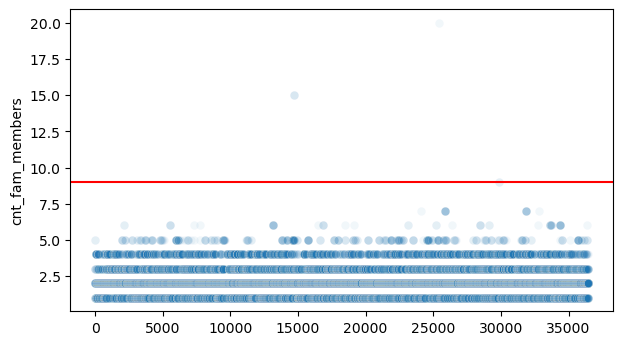

15.0    3
9.0     2
20.0    1
Name: cnt_fam_members, dtype: int64

In [27]:
find_outlier(df, 'cnt_fam_members')

## Times Variables

**days_birth**   
Transforming the days_birth into age.

In [28]:
df['age'] = -(df['days_birth'])//365	
df.drop('days_birth', 1, inplace=True)

In [29]:
find_outlier(df, 'age')

Total of Clients: 36457
Outlier: set()


'No outlier'

**days_employed**   
Transform days_employed into years_employed and convert negative to 0. 

In [30]:
df['years_employed']=-(df['days_employed'])//365	
df.loc[df['years_employed'] < 0, 'years_employed'] = 0 
df.drop('days_employed', 1, inplace=True)

Total of Clients: 36457
Outlier: {23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43}


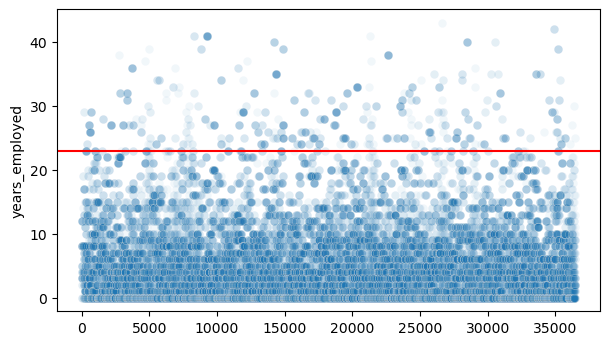

23    169
25    156
27    113
24    104
29     86
26     84
32     54
28     52
31     46
35     35
30     33
33     33
34     22
41     20
40     16
39     16
36     14
38     12
42      4
37      3
43      1
Name: years_employed, dtype: int64

In [31]:
find_outlier(df, 'years_employed')

**first_month**

'years_as_clients'

In [32]:
df['total_months'] = df['first_month'] * -1
df.drop('first_month', 1, inplace=True)

In [33]:
find_outlier(df, 'total_months')

Total of Clients: 36457
Outlier: set()


'No outlier'

**Droppping Outliers**

After check the outliers, we decide to drop:

> cnt_children  greater then 5   
> amt_income_total  greater then  900000  
> cnt_fam_members  greater then 9   

> years_employed  greater then 41


In [34]:
outlier_to_drop = {
    'cnt_children' : 5,
    'amt_income_total': 900000,
     'cnt_fam_members': 9,
     'years_employed': 41
}

In [35]:
for col, value in outlier_to_drop.items():
  df.drop(df[df[col] > value].index, inplace=True)

In [36]:
df.shape

(36421, 18)

## Correlation

<AxesSubplot:>

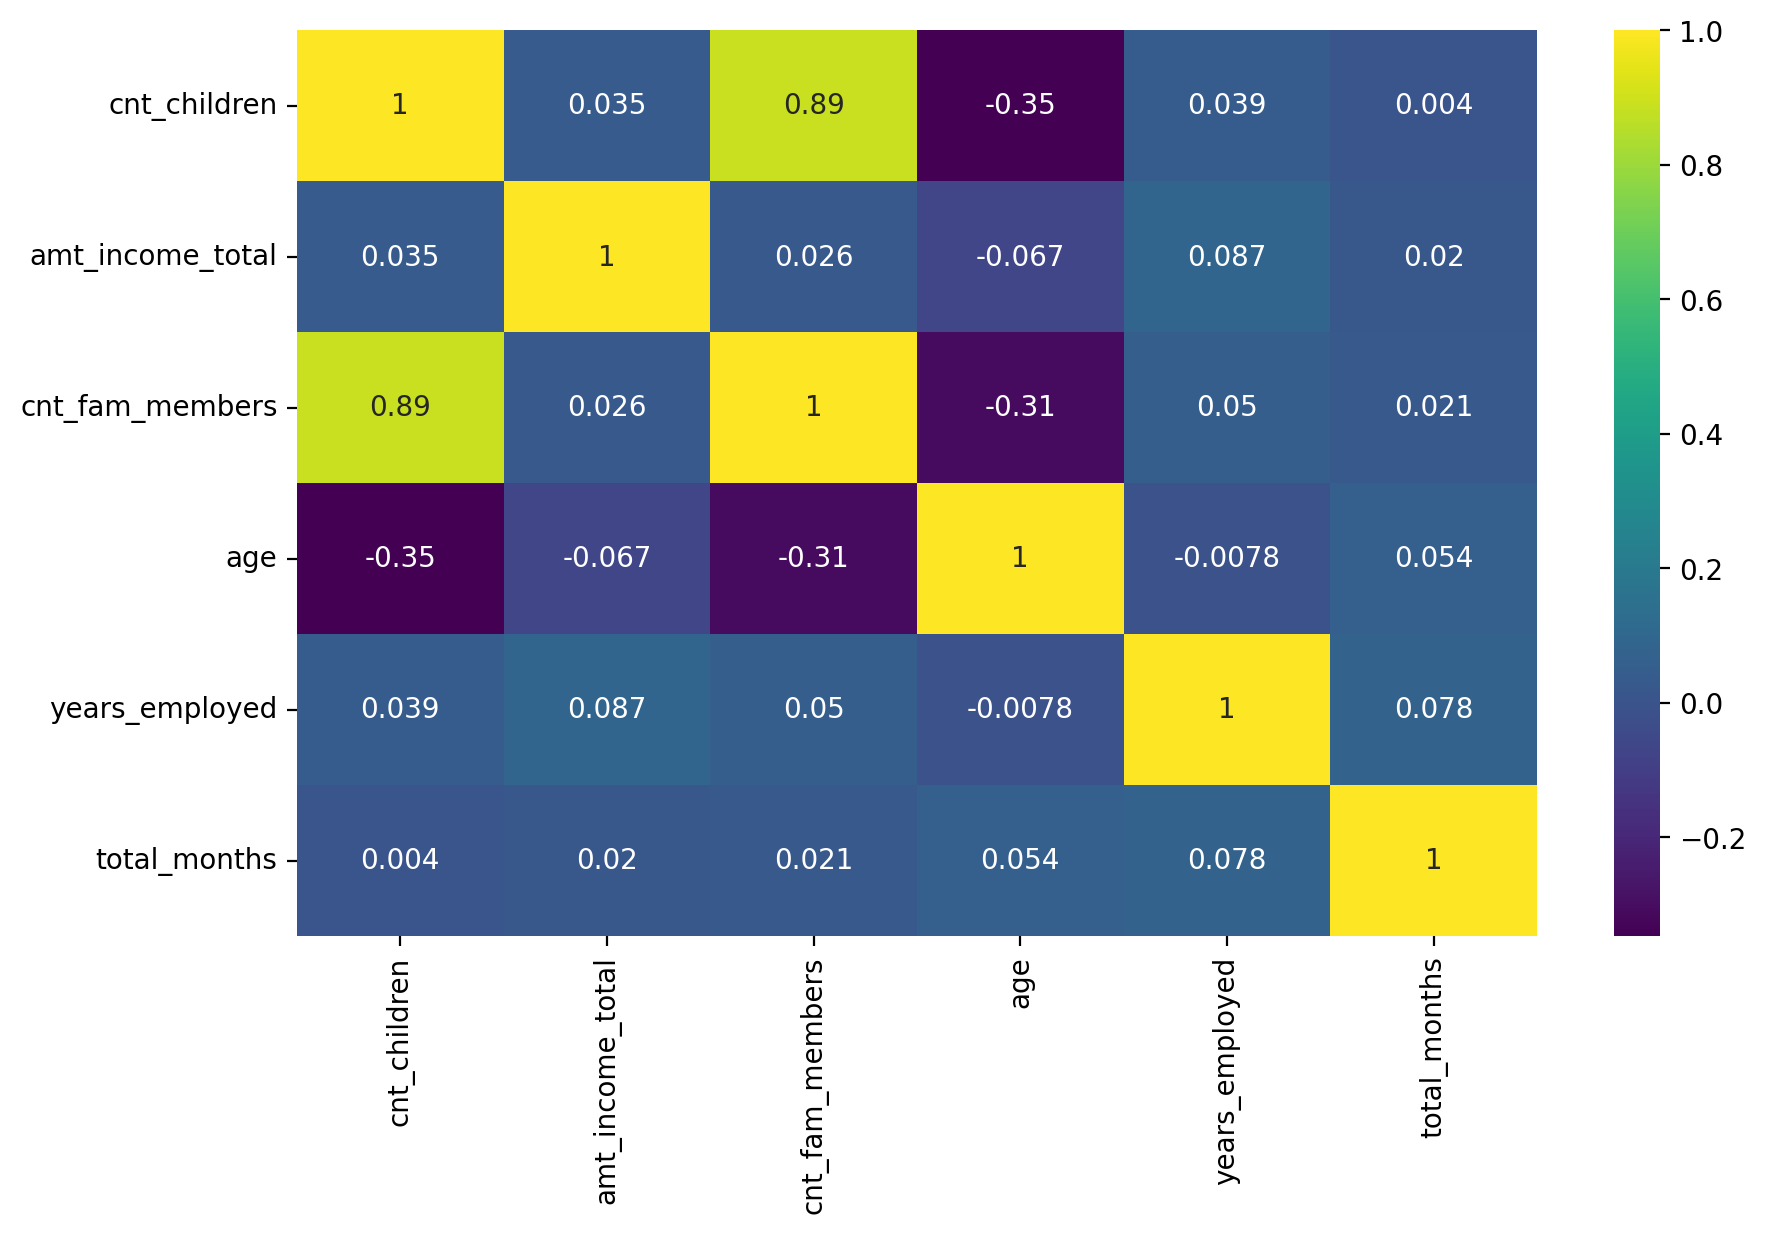

In [37]:
plt.figure(figsize=(10,6), dpi=200)
sns.heatmap(df.corr(), cmap = 'viridis', annot = True)


The features with most corralation make sense. For example:
Older people are the olders clients.

More family members imply more children in the family.  

### Categorical Columns

In [38]:
cat_col = df.columns[(df.dtypes == 'object').values].tolist()
cat_col

['code_gender',
 'flag_own_car',
 'flag_own_realty',
 'name_income_type',
 'name_education_type',
 'name_family_status',
 'name_housing_type',
 'flag_mobil',
 'flag_work_phone',
 'flag_phone',
 'flag_email',
 'risky_client']

In [39]:
df[cat_col].describe().transpose()

,count,unique,top,freq
code_gender,36421,2,F,24409
flag_own_car,36421,2,N,22598
flag_own_realty,36421,2,Y,24483
name_income_type,36421,5,Working,18808
name_education_type,36421,5,Secondary / secondary special,24761
name_family_status,36421,5,Married,25024
name_housing_type,36421,6,House / apartment,32519
flag_mobil,36421,1,1,36421
flag_work_phone,36421,2,0,28207
flag_phone,36421,2,0,25687


`*The top is the most common value. The freq is the most common value’s frequency. `

In [40]:
for col in cat_col:
    print(col,'\n')
    print(df[col].value_counts())
    print('====================================')

code_gender 

F    24409
M    12012
Name: code_gender, dtype: int64
flag_own_car 

N    22598
Y    13823
Name: flag_own_car, dtype: int64
flag_own_realty 

Y    24483
N    11938
Name: flag_own_realty, dtype: int64
name_income_type 

Working                 18808
Commercial associate     8469
Pensioner                6152
State servant            2981
Student                    11
Name: name_income_type, dtype: int64
name_education_type 

Secondary / secondary special    24761
Higher education                  9844
Incomplete higher                 1410
Lower secondary                    374
Academic degree                     32
Name: name_education_type, dtype: int64
name_family_status 

Married                 25024
Single / not married     4820
Civil marriage           2945
Separated                2100
Widow                    1532
Name: name_family_status, dtype: int64
name_housing_type 

House / apartment      32519
With parents            1776
Municipal apartment     1122
Rented

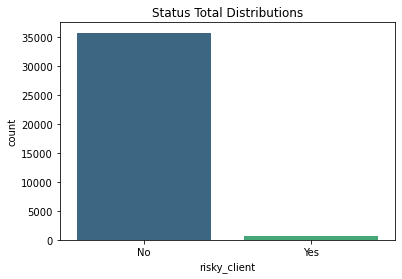

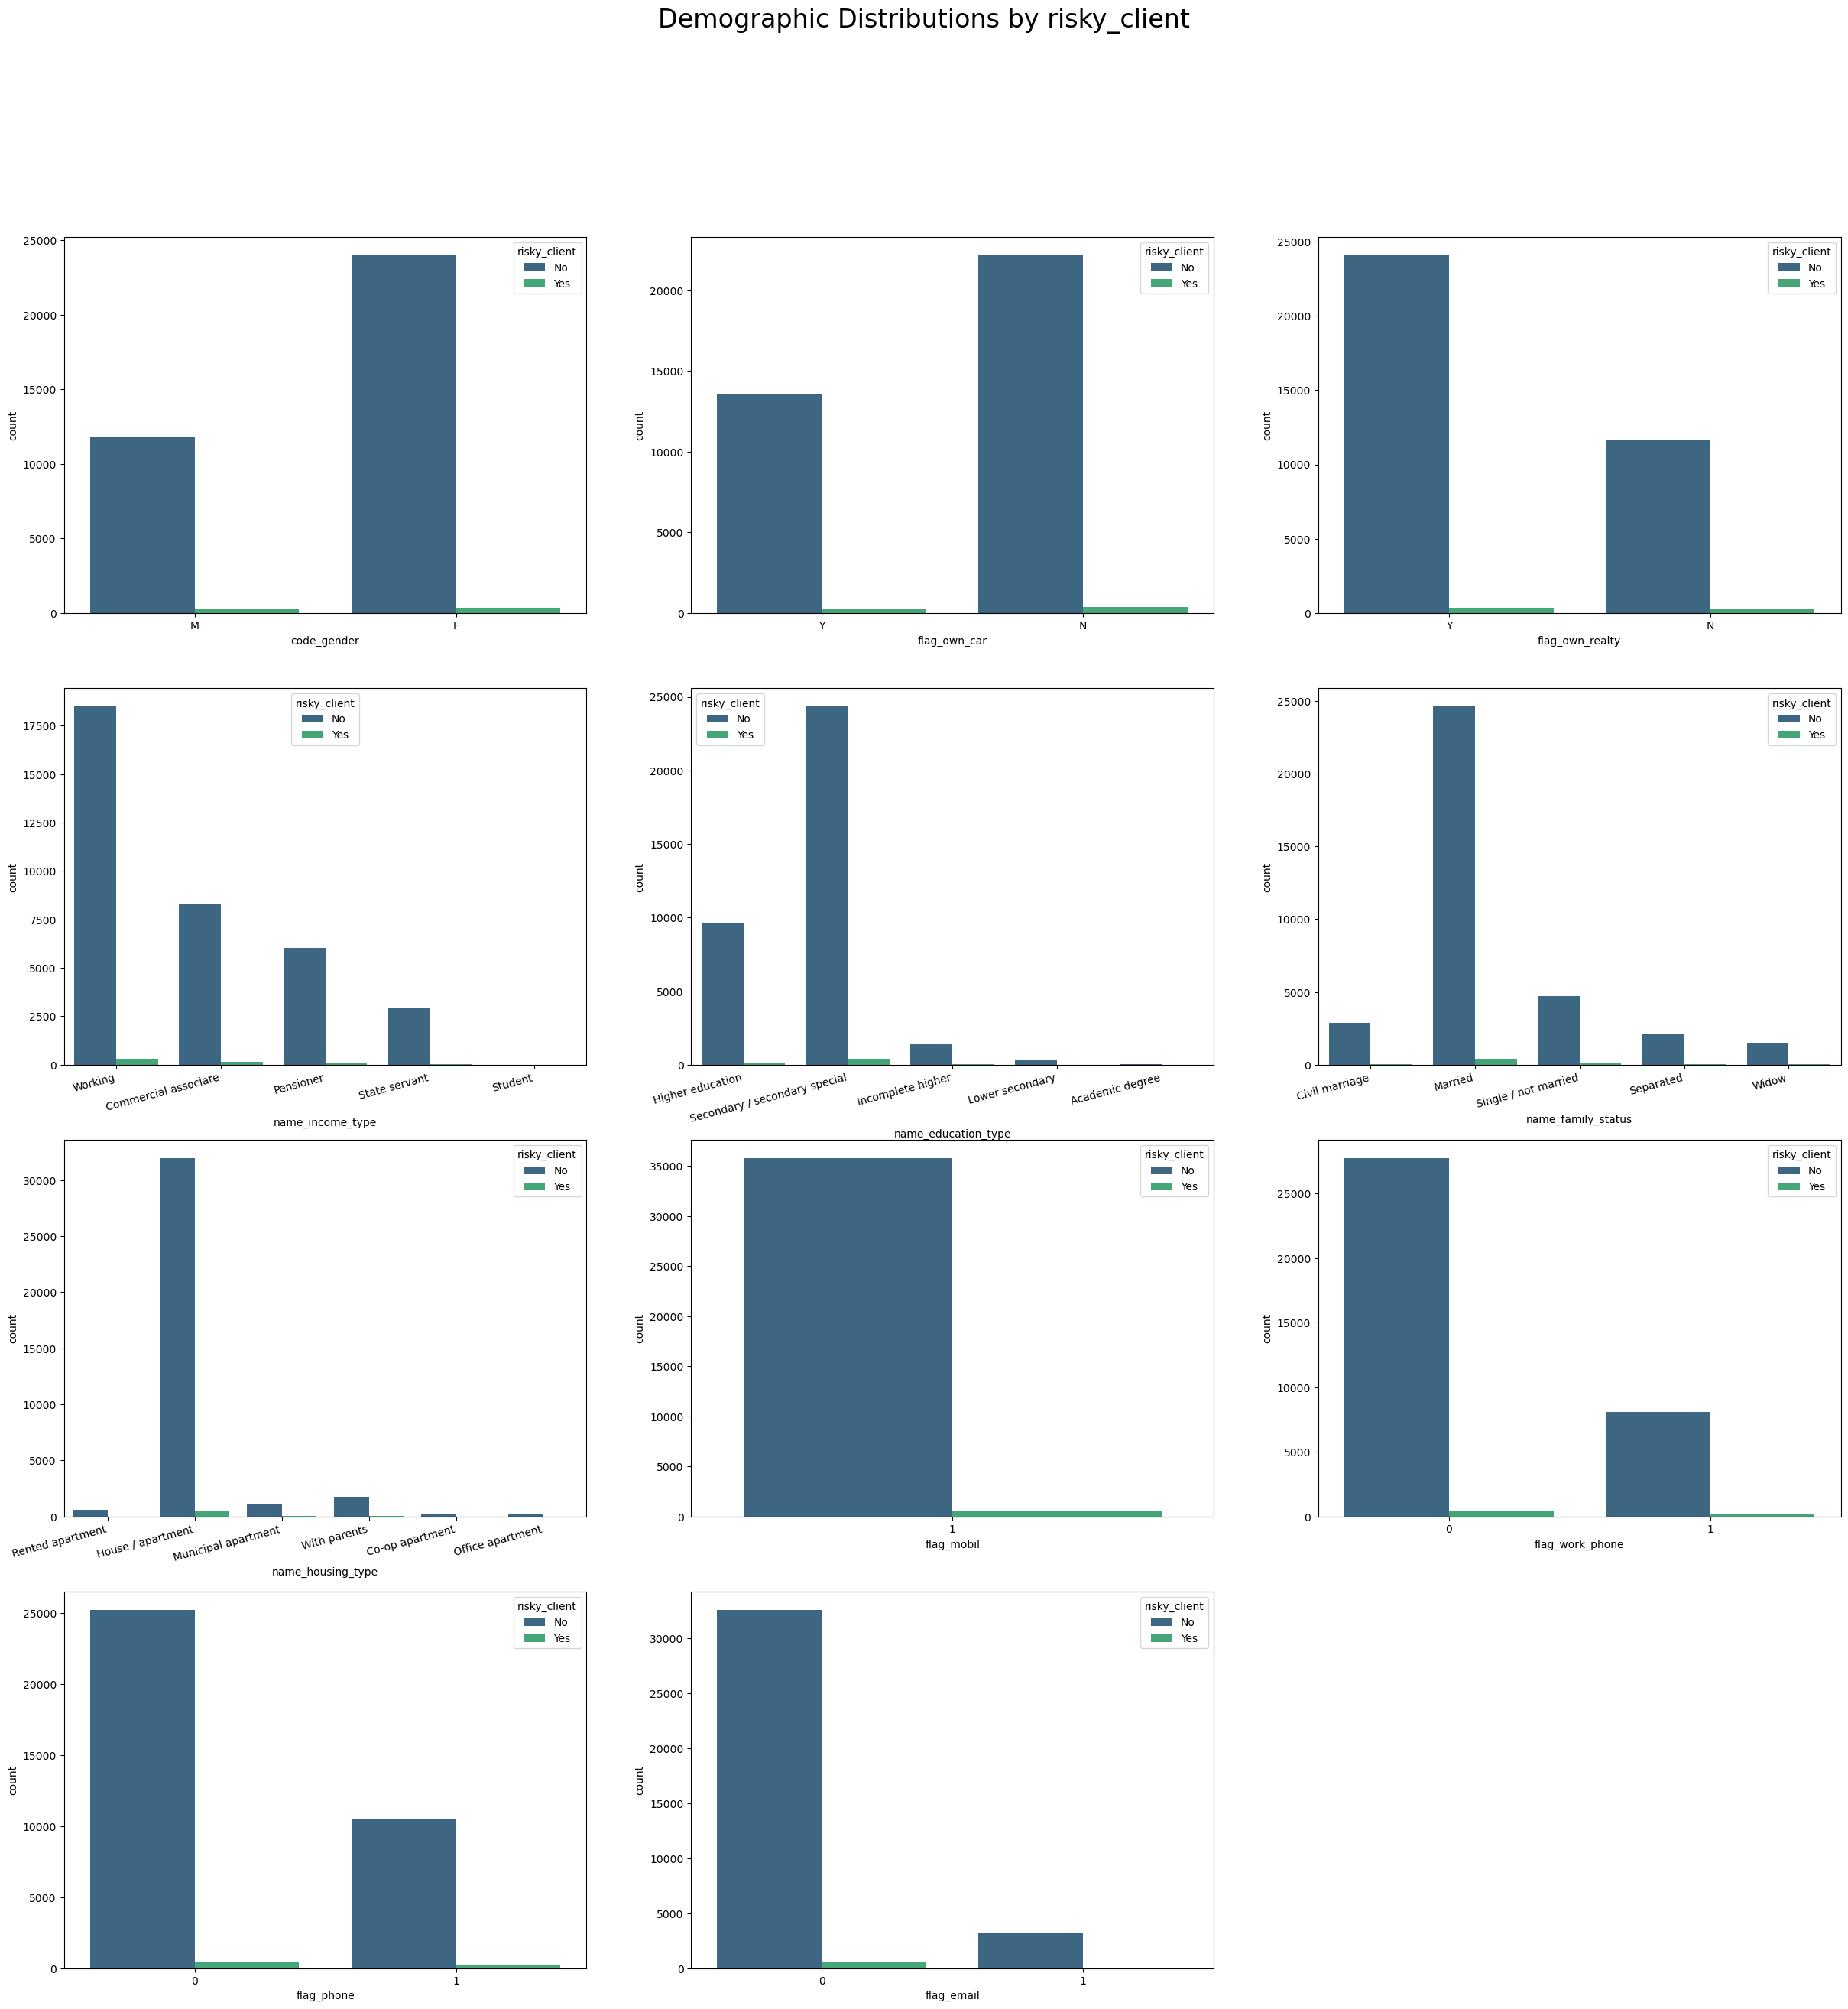

In [41]:
hue_order = ['No','Yes']
sns.countplot(data=df, x='risky_client', 
              order = hue_order, palette="viridis").set_title('Status Total Distributions')

fig, axes = plt.subplots(4,3,figsize = (30,30), dpi= 100)
axes = axes.ravel()



for i, col in enumerate(cat_col[:-1]):
  sns.countplot(data=df, x=col, hue='risky_client', 
                  hue_order = hue_order, ax=axes[i], palette="viridis")
  

for i in np.arange(3, 7):
  for label in axes[i].get_xticklabels():
    label.set_ha("right")
    label.set_rotation(15)


axes.flat[-1].set_visible(False)


fig.suptitle('Demographic Distributions by risky_client', fontsize = 24)
plt.show()

At first look, seems proportional. Categories whitch have more clients are likely two have more risky_clients.

Let's check in witch case the percentage of risky_clients are higher than the data overall

In [42]:
bad_clients_perc = round(len(df[df['risky_client'] == 'Yes']) / len(df), 4)
bad_clients_perc

0.0169

In [43]:
for column in cat_col:
  for category in df[column].unique():
    bad_clients_cat_perc = round(len(df.loc[(df['risky_client'] == 'Yes') & (df[column]== category), column]) / len(df[column]== category),4)
    if  bad_clients_cat_perc > bad_clients_perc:
     print(column,category, bad_clients_cat_perc)

Well, no category from cat_col has percentage of risky_clients are higher than the data overall

# Feature Engineering

Let's see how our df is after data analysis

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36421 entries, 0 to 36456
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_gender          36421 non-null  object 
 1   flag_own_car         36421 non-null  object 
 2   flag_own_realty      36421 non-null  object 
 3   cnt_children         36421 non-null  int64  
 4   amt_income_total     36421 non-null  float64
 5   name_income_type     36421 non-null  object 
 6   name_education_type  36421 non-null  object 
 7   name_family_status   36421 non-null  object 
 8   name_housing_type    36421 non-null  object 
 9   flag_mobil           36421 non-null  object 
 10  flag_work_phone      36421 non-null  object 
 11  flag_phone           36421 non-null  object 
 12  flag_email           36421 non-null  object 
 13  cnt_fam_members      36421 non-null  float64
 14  risky_client         36421 non-null  object 
 15  age                  36421 non-null 

## Split the data

**Separate out the data into X features and y labels**

In [45]:
X = df.drop('risky_client',axis=1)
y = df['risky_client']

**Here we create TRAIN | TEST**

In [46]:
# 70% of data is training data, set aside other 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


## Pipeline

In [47]:
num_col = df.columns[(df.dtypes != 'object').values].tolist()
num_col

['cnt_children',
 'amt_income_total',
 'cnt_fam_members',
 'age',
 'years_employed',
 'total_months']

In [48]:
# Let see cat_col again and remove the target value
cat_col = df.columns[(df.dtypes == 'object').values].tolist()[:-1]
cat_col

['code_gender',
 'flag_own_car',
 'flag_own_realty',
 'name_income_type',
 'name_education_type',
 'name_family_status',
 'name_housing_type',
 'flag_mobil',
 'flag_work_phone',
 'flag_phone',
 'flag_email']

In [49]:
numerical_pipeline = Pipeline([('feature_scaling', StandardScaler())
])

In [50]:
categorical_pipeline = Pipeline([('categorical_encoder', OneHotEncoder(drop='first', handle_unknown='error'))])

In [51]:
column_pipeline = ColumnTransformer(transformers = [
    ("numerical_pipeline", numerical_pipeline, num_col),
    ("categorical_pipeline", categorical_pipeline, cat_col)
])

# Machine Learning Models

In [52]:
list_models_performace = []

## Logistic Regression

Logistic Regression is a Machine Learning algorithm which is used for the classification problems, it is a predictive analysis algorithm and based on the concept of probability. It works by transforming a Linear Regression into a classification model through the use of the logistic function:




<center><img src="https://andymath.com/wp-content/uploads/2019/08/Logistic-Function.jpg"  width= 300px, height=250px/></center>

In [53]:
model= LogisticRegression(random_state=101, solver='liblinear')
smt = SMOTE(random_state=101)
operations = [('column_pipeline',column_pipeline),('smote',smt),('classiffier',model)]
pipe = Pipeline(operations)

In [54]:

param_grid = {'classiffier__penalty': ['l1','l2'], 
              'classiffier__C': [0.001, 0.01, 0.1, 1, 10 , 100, 1000],
              "classiffier__fit_intercept": [True, False]}

In [55]:
grid_model = GridSearchCV(pipe,param_grid,cv=5,n_jobs=-1, scoring='accuracy')

In [56]:
grid_model.fit(X_train, y_train)
print(f'Best score: {grid_model.best_score_} with param: {grid_model.best_params_}')

Best score: 0.6377583555295229 with param: {'classiffier__C': 100, 'classiffier__fit_intercept': True, 'classiffier__penalty': 'l2'}


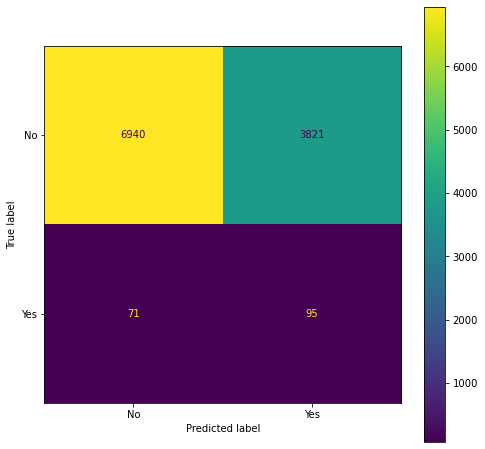

In [57]:
y_pred = grid_model.predict(X_test)
confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(8, 8))

plot_confusion_matrix(grid_model,X_test,y_test, ax=ax)

In [58]:
print(classification_report(y_test,y_pred))
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')


              precision    recall  f1-score   support

          No       0.99      0.64      0.78     10761
         Yes       0.02      0.57      0.05       166

    accuracy                           0.64     10927
   macro avg       0.51      0.61      0.41     10927
weighted avg       0.98      0.64      0.77     10927

Accuracy Score: 0.643818065342729


In [59]:
list_models_performace.append({'model':'Logistic Regression','Training set score': grid_model.best_score_, 'Validation set score' : accuracy_score(y_test,y_pred)})


In [60]:
list_models_performace

[{'model': 'Logistic Regression',
  'Training set score': 0.6377583555295229,
  'Validation set score': 0.643818065342729}]

## K-Nearest Neighbors  

K Nearest Neighbour is a simple algorithm that stores all the available cases and classifies the new data or case based on a similarity measure. It is mostly used to classifies a data point based on how its neighbours are classified. It’s commonly used to solve problems in various industries because its ease of use, application to classification and regression problems, and the ease of interpretability of the results it generates.

<center><img src="https://docsdrive.com/images/ansinet/jas/2010/fig4-2k10-1841-1858.gif"  width= 300px, height=250px/></center>

In [61]:
model= KNeighborsClassifier(algorithm='auto')
smt = SMOTE(random_state=101)
operations = [('column_pipeline',column_pipeline),('smote',smt),('classiffier',model)]
pipe = Pipeline(operations)

In [62]:
param_grid = {'classiffier__n_neighbors': np.arange(1, 15),
                  'classiffier__p': (1,2)}

In [63]:
grid_model = GridSearchCV(pipe,param_grid,cv=5,n_jobs=-1, scoring='accuracy')

In [64]:
grid_model.fit(X_train, y_train)
print(f'Best score: {grid_model.best_score_} with param: {grid_model.best_params_}')

Best score: 0.9724641044163537 with param: {'classiffier__n_neighbors': 2, 'classiffier__p': 1}


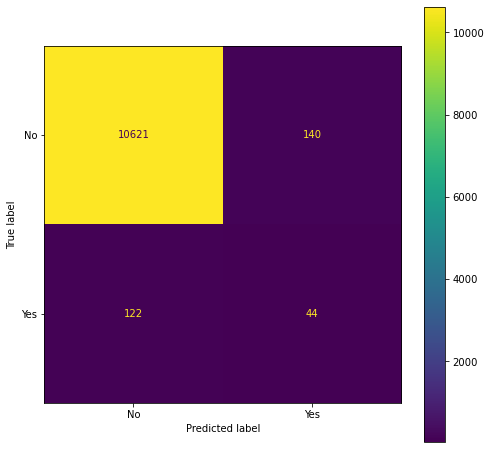

In [65]:
y_pred = grid_model.predict(X_test)
confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(8, 8))

plot_confusion_matrix(grid_model,X_test,y_test, ax=ax)

In [66]:
print(classification_report(y_test,y_pred))
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')


              precision    recall  f1-score   support

          No       0.99      0.99      0.99     10761
         Yes       0.24      0.27      0.25       166

    accuracy                           0.98     10927
   macro avg       0.61      0.63      0.62     10927
weighted avg       0.98      0.98      0.98     10927

Accuracy Score: 0.9760226960739453


In [67]:
list_models_performace.append({'model':'KNN','Training set score': grid_model.best_score_, 'Validation set score' : accuracy_score(y_test,y_pred)})

In [68]:
list_models_performace

[{'model': 'Logistic Regression',
  'Training set score': 0.6377583555295229,
  'Validation set score': 0.643818065342729},
 {'model': 'KNN',
  'Training set score': 0.9724641044163537,
  'Validation set score': 0.9760226960739453}]

## Support Vector Machines - SVM

SVM or Support Vector Machine is a linear model for classification and regression problems. It can solve linear and non-linear problems and work well for many practical problems. The idea of SVM is simple: The algorithm finds a line (or hyperplane in dimensions greater than 2) in between different classes of data such that the distance on either side of that line or hyperplane to the next-closest data points is maximized.

<center><img src="https://vitalflux.com/wp-content/uploads/2020/07/Screenshot-2020-07-07-at-3.44.38-PM.png"  width= 400px, height=250px/></center>

In [69]:
model= SVC()
smt = SMOTE(random_state=101)
operations = [('column_pipeline',column_pipeline),('smote',smt),('classiffier',model)]
pipe = Pipeline(operations)

In [70]:
param_grid = {'classiffier__C': [1, 10]}


In [71]:
grid_model = GridSearchCV(pipe,param_grid,cv=5,n_jobs=-1, scoring='accuracy')

In [72]:
grid_model.fit(X_train, y_train)
print(f'Best score: {grid_model.best_score_} with param: {grid_model.best_params_}')

Best score: 0.9377502461847802 with param: {'classiffier__C': 10}


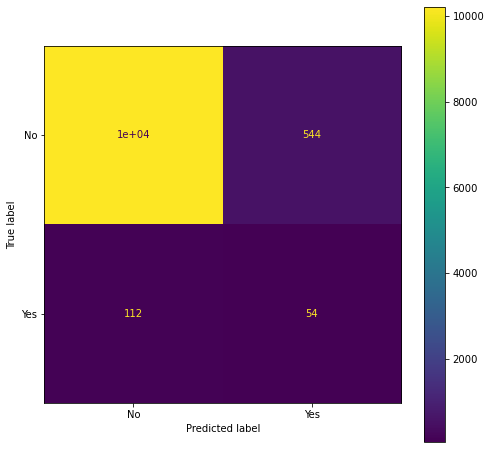

In [73]:
y_pred = grid_model.predict(X_test)
confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(8, 8))

plot_confusion_matrix(grid_model,X_test,y_test, ax=ax)

In [74]:
print(classification_report(y_test,y_pred))
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')


              precision    recall  f1-score   support

          No       0.99      0.95      0.97     10761
         Yes       0.09      0.33      0.14       166

    accuracy                           0.94     10927
   macro avg       0.54      0.64      0.56     10927
weighted avg       0.98      0.94      0.96     10927

Accuracy Score: 0.9399652237576644


In [75]:
list_models_performace.append({'model':'SVM','Training set score': grid_model.best_score_, 'Validation set score' : accuracy_score(y_test,y_pred)})

In [76]:
list_models_performace

[{'model': 'Logistic Regression',
  'Training set score': 0.6377583555295229,
  'Validation set score': 0.643818065342729},
 {'model': 'KNN',
  'Training set score': 0.9724641044163537,
  'Validation set score': 0.9760226960739453},
 {'model': 'SVM',
  'Training set score': 0.9377502461847802,
  'Validation set score': 0.9399652237576644}]

## Decision Tree

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.
There are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.
The decisions or the test are performed on the basis of features of the given dataset.
It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.
It is called a decision tree because, similar to a tree, it starts with the root node, which expands on further branches and constructs a tree-like structure.
In order to build a tree, we use the CART algorithm, which stands for Classification and Regression Tree algorithm.
A decision tree simply asks a question, and based on the answer (Yes/No), it further split the tree into subtrees.
Below diagram explains the general structure of a decision tree:


<center><img src="https://static.javatpoint.com/tutorial/machine-learning/images/decision-tree-classification-algorithm.png"  width= 500px, height=300px/></center>

In [77]:
model= DecisionTreeClassifier()
smt = SMOTE(random_state=101)
operations = [('column_pipeline',column_pipeline),('smote',smt),('classiffier',model)]
pipe = Pipeline(operations)

In [78]:
param_grid = {'classiffier__criterion': ['gini','entropy'],
              'classiffier__max_depth': [5, 8, 15, 25, 30]}

In [79]:
grid_model = GridSearchCV(pipe,param_grid,cv=5,n_jobs=-1, scoring='roc_auc')

In [80]:
grid_model.fit(X_train, y_train)
print(f'Best score: {grid_model.best_score_} with param: {grid_model.best_params_}')

Best score: 0.6288533900870517 with param: {'classiffier__criterion': 'gini', 'classiffier__max_depth': 15}


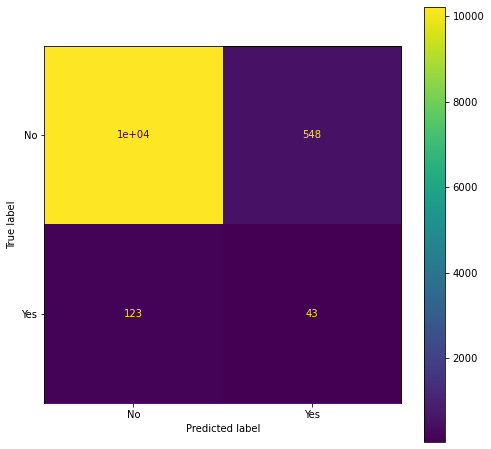

In [81]:
y_pred = grid_model.predict(X_test)
confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(8, 8))

plot_confusion_matrix(grid_model,X_test,y_test, ax=ax)

In [82]:
print(classification_report(y_test,y_pred))
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')


              precision    recall  f1-score   support

          No       0.99      0.95      0.97     10761
         Yes       0.07      0.26      0.11       166

    accuracy                           0.94     10927
   macro avg       0.53      0.60      0.54     10927
weighted avg       0.97      0.94      0.96     10927

Accuracy Score: 0.9385924773496843


In [83]:
list_models_performace.append({'model':'Decision Tree','Training set score': grid_model.best_score_, 'Validation set score' : accuracy_score(y_test,y_pred)})

In [84]:
list_models_performace

[{'model': 'Logistic Regression',
  'Training set score': 0.6377583555295229,
  'Validation set score': 0.643818065342729},
 {'model': 'KNN',
  'Training set score': 0.9724641044163537,
  'Validation set score': 0.9760226960739453},
 {'model': 'SVM',
  'Training set score': 0.9377502461847802,
  'Validation set score': 0.9399652237576644},
 {'model': 'Decision Tree',
  'Training set score': 0.6288533900870517,
  'Validation set score': 0.9385924773496843}]

## Random Forest

Random forest is the most simple and widely used algorithm. Used for both classification and regression. It is an ensemble of randomized decision trees. Each decision tree gives a vote for the prediction of target variable. Random forest choses the prediction that gets the most vote.

Random Forest is a ensemble bagging algorithm to achieve low prediction error. It reduces the variance of the individual decision trees by randomly selecting trees and then either average them or picking the class that gets the most vote.




<center><img src="https://cdn.corporatefinanceinstitute.com/assets/random-forest.png"  width= 500px, height=300px/></center>

In [85]:
model= RandomForestClassifier()
smt = SMOTE(random_state=101)
operations = [('column_pipeline',column_pipeline),('smote',smt),('classiffier',model)]
pipe = Pipeline(operations)

In [86]:
param_grid = {'classiffier__max_depth': [5, 8, 15, 25, 30] }

In [87]:
grid_model = GridSearchCV(pipe,param_grid,cv=5,n_jobs=-1, scoring='accuracy')

In [88]:
grid_model.fit(X_train, y_train)
print(f'Best score: {grid_model.best_score_} with param: {grid_model.best_params_}')

Best score: 0.9794461425255039 with param: {'classiffier__max_depth': 30}


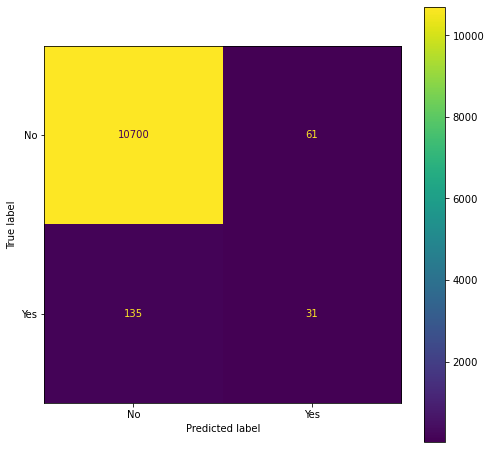

In [89]:
y_pred = grid_model.predict(X_test)
confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(8, 8))

plot_confusion_matrix(grid_model,X_test,y_test, ax=ax)

In [90]:
print(classification_report(y_test,y_pred))
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')


              precision    recall  f1-score   support

          No       0.99      0.99      0.99     10761
         Yes       0.34      0.19      0.24       166

    accuracy                           0.98     10927
   macro avg       0.66      0.59      0.62     10927
weighted avg       0.98      0.98      0.98     10927

Accuracy Score: 0.9820627802690582


In [91]:
list_models_performace.append({'model':'Random Forest','Training set score': grid_model.best_score_, 'Validation set score' : accuracy_score(y_test,y_pred)})

In [92]:
list_models_performace

[{'model': 'Logistic Regression',
  'Training set score': 0.6377583555295229,
  'Validation set score': 0.643818065342729},
 {'model': 'KNN',
  'Training set score': 0.9724641044163537,
  'Validation set score': 0.9760226960739453},
 {'model': 'SVM',
  'Training set score': 0.9377502461847802,
  'Validation set score': 0.9399652237576644},
 {'model': 'Decision Tree',
  'Training set score': 0.6288533900870517,
  'Validation set score': 0.9385924773496843},
 {'model': 'Random Forest',
  'Training set score': 0.9794461425255039,
  'Validation set score': 0.9820627802690582}]

## XGBoost

XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework.
It was initially developed by Tianqi Chen in 2014 and much faster until gradient boost, so it is a preferred boosting method. Thanks to the hyperparameters it contains, many adjustments can be made such as regularization hyperparameter prevent overfitting.

<center><img src="https://miro.medium.com/max/1400/1*QJZ6W-Pck_W7RlIDwUIN9Q.jpeg"  width= 600px, height=300px/></center>



In [93]:
model= XGBClassifier(eval_metric= 'error')
smt = SMOTE(random_state=101)
operations = [('column_pipeline',column_pipeline),('smote',smt),('classiffier',model)]
pipe = Pipeline(operations)

In [94]:
param_grid = {'classiffier__max_depth': [5, 20, 40, 60]}

In [95]:
grid_model = GridSearchCV(pipe,param_grid,cv=5,n_jobs=-1, scoring='accuracy')

In [96]:
grid_model.fit(X_train, y_train)
print(f'Best score: {grid_model.best_score_} with param: {grid_model.best_params_}')

Best score: 0.9801914405481547 with param: {'classiffier__max_depth': 40}


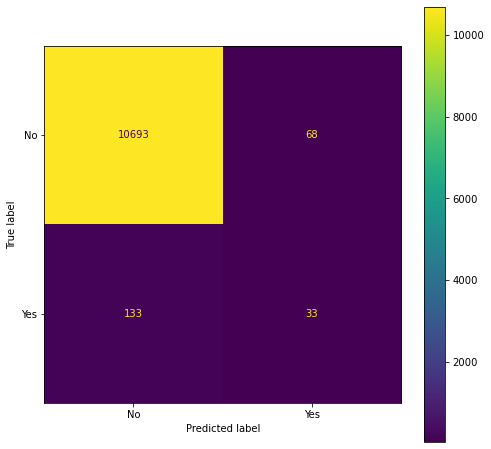

In [97]:
y_pred = grid_model.predict(X_test)
confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(8, 8))

plot_confusion_matrix(grid_model,X_test,y_test, ax=ax)

In [98]:
print(classification_report(y_test,y_pred))
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')


              precision    recall  f1-score   support

          No       0.99      0.99      0.99     10761
         Yes       0.33      0.20      0.25       166

    accuracy                           0.98     10927
   macro avg       0.66      0.60      0.62     10927
weighted avg       0.98      0.98      0.98     10927

Accuracy Score: 0.9816051981330649


In [99]:
list_models_performace.append({'model':'XGBoost','Training set score': grid_model.best_score_, 'Validation set score' : accuracy_score(y_test,y_pred)})

In [100]:
list_models_performace

[{'model': 'Logistic Regression',
  'Training set score': 0.6377583555295229,
  'Validation set score': 0.643818065342729},
 {'model': 'KNN',
  'Training set score': 0.9724641044163537,
  'Validation set score': 0.9760226960739453},
 {'model': 'SVM',
  'Training set score': 0.9377502461847802,
  'Validation set score': 0.9399652237576644},
 {'model': 'Decision Tree',
  'Training set score': 0.6288533900870517,
  'Validation set score': 0.9385924773496843},
 {'model': 'Random Forest',
  'Training set score': 0.9794461425255039,
  'Validation set score': 0.9820627802690582},
 {'model': 'XGBoost',
  'Training set score': 0.9801914405481547,
  'Validation set score': 0.9816051981330649}]

## LightGBM

LGBM (stands for Light Gradient Boosting Machine) was initially released by Microsoft in 2017 and is another Gradient Boosting method preferred by users and is a decision tree based. The key difference from other methods is that it splits the tree based on leaves, that is, it can detect and stop the units needed by point shooting (remember: the others are in depth-based or level-based). 

As LGBM is leaf-based, as seen in the figure above, LGBM is a very effective method in terms of reducing the error and therefore increasing the accuracy and speed. You can split categorical data with the special algorithm, but an integer value such as index must be entered instead of the string name of the column.

<center><img src="https://miro.medium.com/max/700/1*3JP7lDKx4mE5ZUUd9nIR6g.jpeg"  width= 600px, height=300px/></center>



In [101]:
model= LGBMClassifier()
smt = SMOTE(random_state=101)
operations = [('column_pipeline',column_pipeline),('smote',smt),('classiffier',model)]
pipe = Pipeline(operations)

In [102]:
param_grid = {
    'classiffier__num_leaves': [31, 127],
    'classiffier__reg_alpha': [0.1, 0.5]
    }


In [103]:
grid_model = GridSearchCV(pipe,param_grid,cv=5,n_jobs=-1, scoring='accuracy')

In [104]:
grid_model.fit(X_train, y_train)
print(f'Best score: {grid_model.best_score_} with param: {grid_model.best_params_}')

Best score: 0.9802306639252876 with param: {'classiffier__num_leaves': 127, 'classiffier__reg_alpha': 0.1}


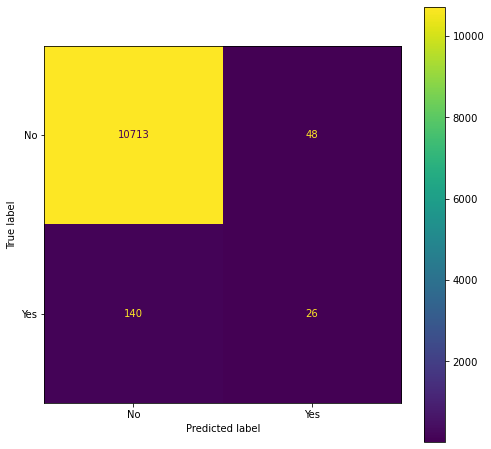

In [105]:
y_pred = grid_model.predict(X_test)
confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(8, 8))

plot_confusion_matrix(grid_model,X_test,y_test, ax=ax)

In [106]:
print(classification_report(y_test,y_pred))
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')


              precision    recall  f1-score   support

          No       0.99      1.00      0.99     10761
         Yes       0.35      0.16      0.22       166

    accuracy                           0.98     10927
   macro avg       0.67      0.58      0.60     10927
weighted avg       0.98      0.98      0.98     10927

Accuracy Score: 0.9827949116866478


In [107]:
list_models_performace.append({'model':'LightGBM','Training set score': grid_model.best_score_, 'Validation set score' : accuracy_score(y_test,y_pred)})

In [108]:
list_models_performace

[{'model': 'Logistic Regression',
  'Training set score': 0.6377583555295229,
  'Validation set score': 0.643818065342729},
 {'model': 'KNN',
  'Training set score': 0.9724641044163537,
  'Validation set score': 0.9760226960739453},
 {'model': 'SVM',
  'Training set score': 0.9377502461847802,
  'Validation set score': 0.9399652237576644},
 {'model': 'Decision Tree',
  'Training set score': 0.6288533900870517,
  'Validation set score': 0.9385924773496843},
 {'model': 'Random Forest',
  'Training set score': 0.9794461425255039,
  'Validation set score': 0.9820627802690582},
 {'model': 'XGBoost',
  'Training set score': 0.9801914405481547,
  'Validation set score': 0.9816051981330649},
 {'model': 'LightGBM',
  'Training set score': 0.9802306639252876,
  'Validation set score': 0.9827949116866478}]

# Model Selection

In [109]:
pd.DataFrame.from_dict(list_models_performace).sort_values(by=['Validation set score'], ascending=False)

,model,Training set score,Validation set score
6,LightGBM,0.980231,0.982795
4,Random Forest,0.979446,0.982063
5,XGBoost,0.980191,0.981605
1,KNN,0.972464,0.976023
2,SVM,0.937750,0.939965
3,Decision Tree,0.628853,0.938592
0,Logistic Regression,0.637758,0.643818


In [110]:
model= LGBMClassifier()
smt = SMOTE(random_state=101)
operations = [('column_pipeline',column_pipeline),('smote',smt),('classiffier',model)]
pipe = Pipeline(operations)

In [111]:
param_grid = {
    'classiffier__num_leaves': [31, 127],
    'classiffier__reg_alpha': [0.1, 0.5]
    }


In [112]:
grid_model = GridSearchCV(pipe,param_grid,cv=5,n_jobs=-1, scoring='accuracy')

In [113]:
grid_model.fit(X_train, y_train)
print(f'Best score: {grid_model.best_score_} with param: {grid_model.best_params_}')

Best score: 0.9802306639252876 with param: {'classiffier__num_leaves': 127, 'classiffier__reg_alpha': 0.1}


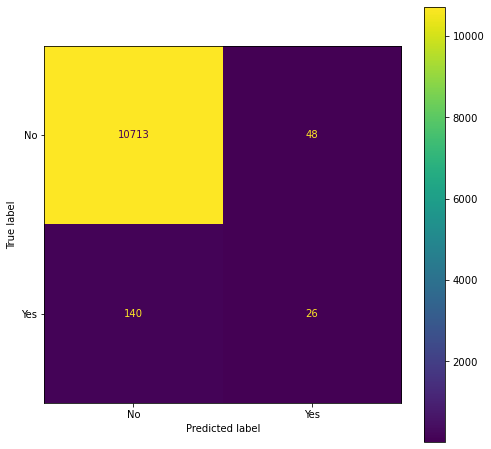

In [114]:
y_pred = grid_model.predict(X_test)
confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(8, 8))

plot_confusion_matrix(grid_model,X_test,y_test, ax=ax)

In [115]:
print(classification_report(y_test,y_pred))
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')


              precision    recall  f1-score   support

          No       0.99      1.00      0.99     10761
         Yes       0.35      0.16      0.22       166

    accuracy                           0.98     10927
   macro avg       0.67      0.58      0.60     10927
weighted avg       0.98      0.98      0.98     10927

Accuracy Score: 0.9827949116866478


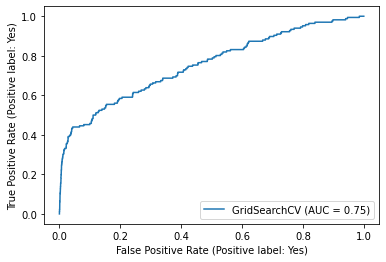

In [116]:
plot_roc_curve(grid_model, X_test, y_test) 

In [117]:
cat_name_after_encode = grid_model.best_estimator_.named_steps['column_pipeline'].transformers_[1][1]\
   .named_steps['categorical_encoder'].get_feature_names(cat_col)
features = list(num_col) + list(cat_name_after_encode)
feature_importance_df = pd.DataFrame(sorted(zip(grid_model.best_estimator_.named_steps["classiffier"].feature_importances_, features)), columns=['feature_importances', 'Features'])

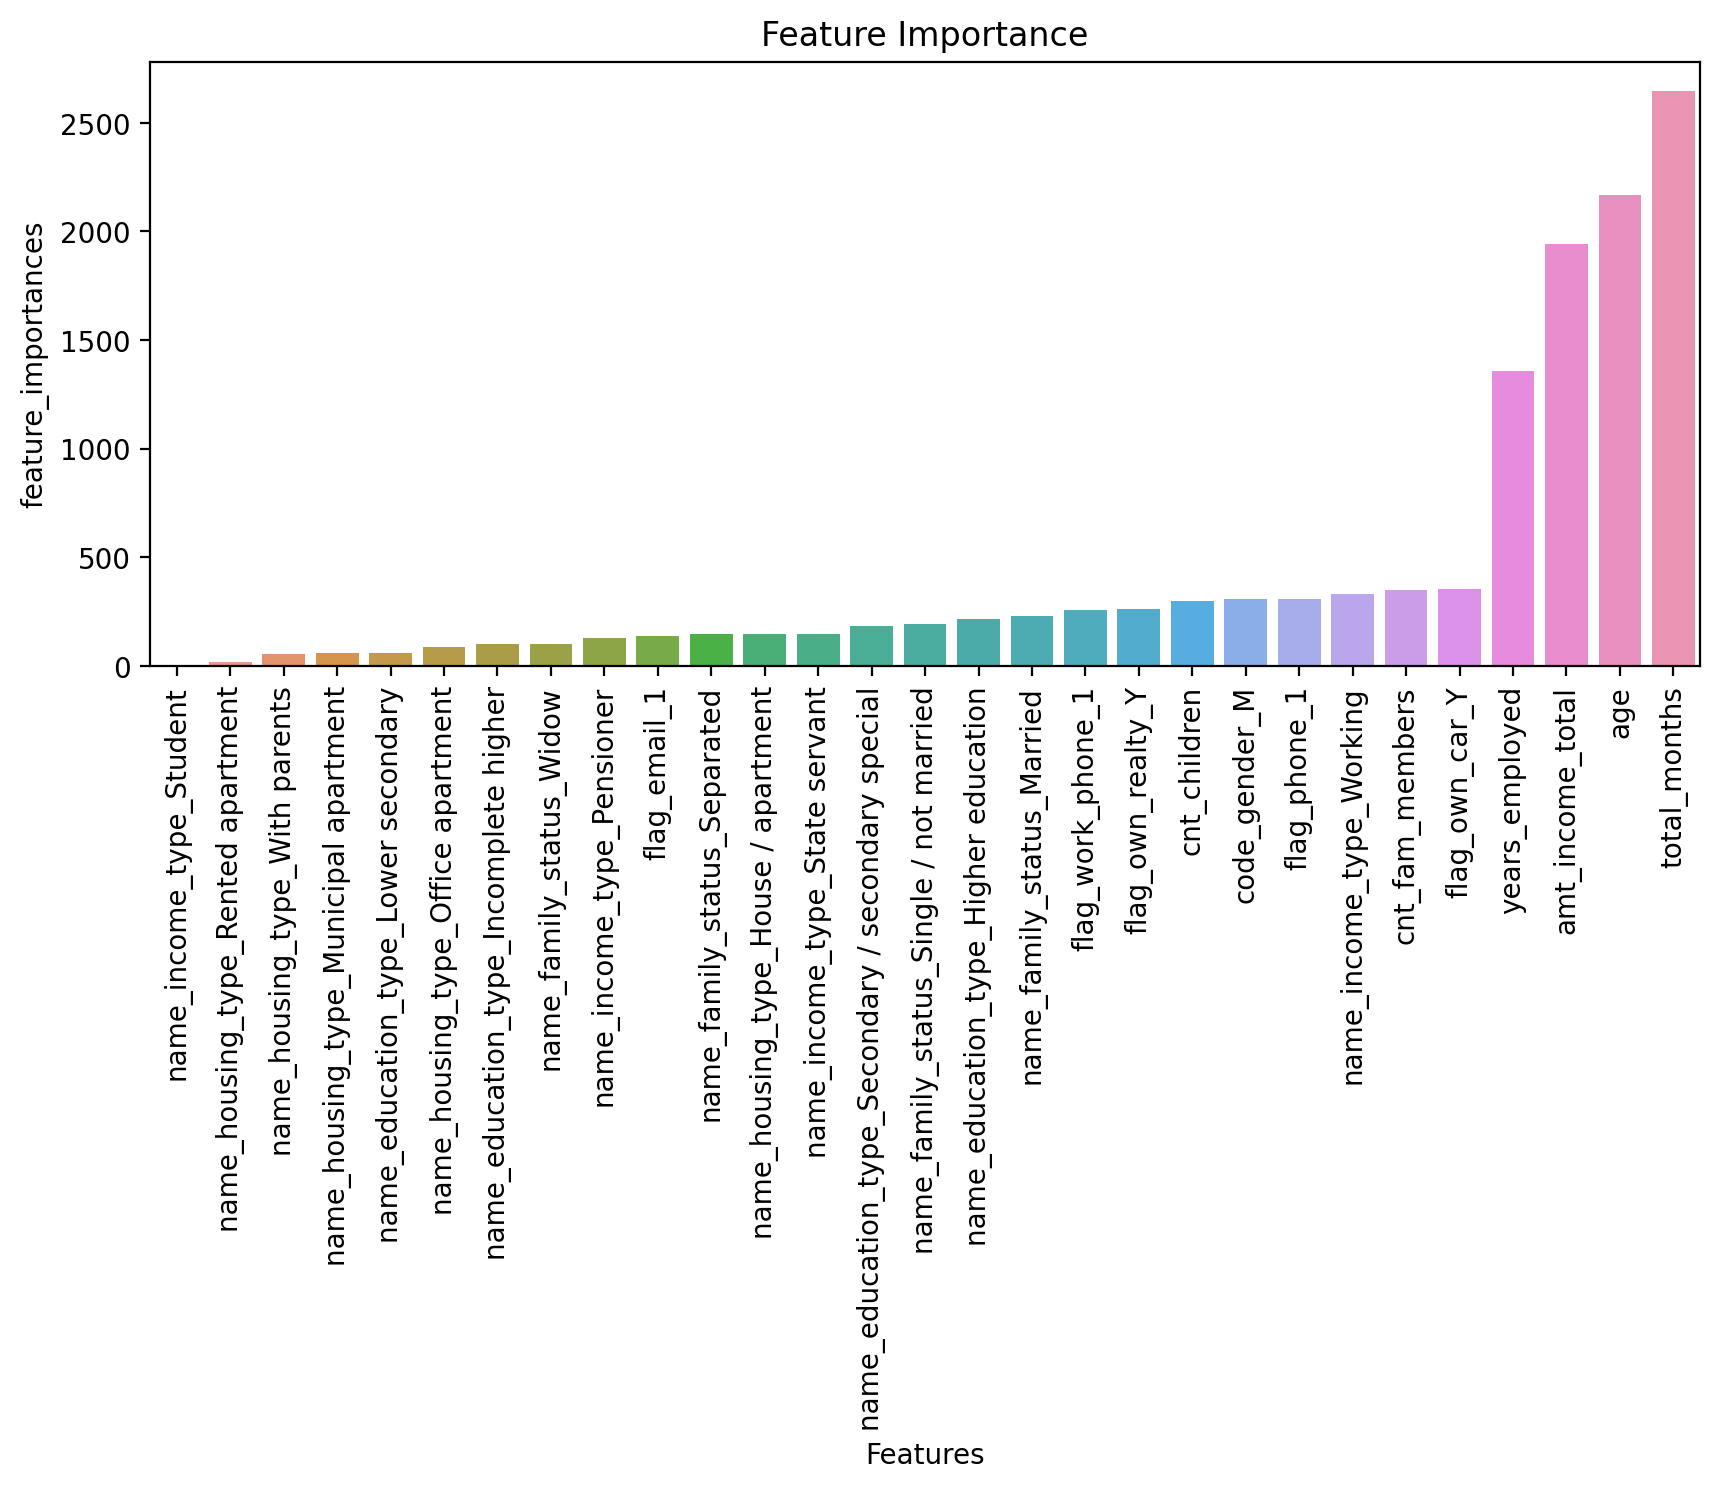

In [118]:
plt.figure(figsize=(10,4),dpi=200)
ax = sns.barplot(x="Features", y="feature_importances", data=feature_importance_df)
plt.title("Feature Importance")
plt.xticks(rotation=90);

# Saving Model

In [119]:
joblib.dump(grid_model,"grid_model.pkl")

['grid_model.pkl']

In [120]:
column_names = list(X_train.columns)
column_names

['code_gender',
 'flag_own_car',
 'flag_own_realty',
 'cnt_children',
 'amt_income_total',
 'name_income_type',
 'name_education_type',
 'name_family_status',
 'name_housing_type',
 'flag_mobil',
 'flag_work_phone',
 'flag_phone',
 'flag_email',
 'cnt_fam_members',
 'age',
 'years_employed',
 'total_months']

In [121]:
joblib.dump(column_names,"column_names.pkl")

['column_names.pkl']

# Loading Model (Model Persistence)

In [122]:
col_names = joblib.load("column_names.pkl")
col_names

['code_gender',
 'flag_own_car',
 'flag_own_realty',
 'cnt_children',
 'amt_income_total',
 'name_income_type',
 'name_education_type',
 'name_family_status',
 'name_housing_type',
 'flag_mobil',
 'flag_work_phone',
 'flag_phone',
 'flag_email',
 'cnt_fam_members',
 'age',
 'years_employed',
 'total_months']

In [123]:
loaded_model = joblib.load(f"grid_model.pkl")

Let's see how it predict a no risk client

In [124]:
df_a = pd.DataFrame(X_test.loc[X_test.index[0]])
df_a.transpose()

,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,flag_mobil,flag_work_phone,flag_phone,flag_email,cnt_fam_members,age,years_employed,total_months
1802,F,N,Y,0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,50,14,14.0


In [125]:
loaded_model.predict(df_a.transpose())

array(['No'], dtype=object)

Now let's see any example of a risky client. 

In [126]:
ad = df.copy()
ad.drop('risky_client',axis=1, inplace=True)
df_a = pd.DataFrame(ad.iloc[652])
df_a.transpose()

,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,flag_mobil,flag_work_phone,flag_phone,flag_email,cnt_fam_members,age,years_employed,total_months
652,F,N,N,0,238500.0,Working,Secondary / secondary special,Married,House / apartment,1,1,0,0,2.0,52,9,59.0


In [127]:
loaded_model.predict(df_a.transpose())

array(['Yes'], dtype=object)

# Conclusion

The goal of this project was create a model that predict if the client  who applied for a credit card in a company was a risky client or not. The client who are classified as risky can't have the credit card approved. After evaluate several models, the LightGBM	was the one with most accuracy both in the train dataset and test dataset with score greater than 98%. The roc_curve shown AUC with 76% witch is also a good score.  When we analyze  the feature importance, we could see that the features witch shown the number of years employed(**yers_employed**), the clients imcome( **amt_income_total**), the age and the total number of months that the client is with the company(**total_months**), witch are all numerical categories, are the most important ones to predict a good/bad clients. The categorical feature with most importance is the name_income_type_working, witch shown that the clients income comes from working. Although the data was quite unbalanced, we worked around it by using the Imbalanced-learn (imported as imblearn) library that is an open source, MIT-licensed library relying on scikit-learn (imported as sklearn) and provides tools when dealing with classification with imbalanced classes.



# Next Steps



*   Now it's time two deploy our model and put it in production by using Flask, bootstrap and heroku. 




# References 

https://www.kaggle.com/rikdifos/credit-card-approval-prediction-using-ml

https://scialert.net/fulltext/?doi=jas.2010.1841.1858

https://towardsdatascience.com/k-nearest-neighbours-explained-7c49853633b6

https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989

https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d

